# **Task 1**

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

## **Load Data**

In [2]:
df = pd.read_csv("./data/task_1.csv")

In [3]:
# Display the first few rows of the data
display(df.head())

,x,mean_energy,mean_contrast,std_energy,std_contrast,median_energy,median_contrast,min_brightness,max_brightness,max_energy,energy_snr,contrast_snr
0,4.0,119.509397,0.319350,6.043708,0.043563,119.205627,0.334923,20,255,139.890252,5.320942,9.564983
1,4.1,118.522956,0.301935,5.764359,0.041965,118.593805,0.316472,18,255,140.126921,5.692218,9.353017
2,4.2,142.154059,0.291655,6.703512,0.039075,141.573808,0.304916,28,255,165.382762,5.862572,9.325854
3,4.3,146.160206,0.286448,5.829100,0.033188,145.683545,0.294996,31,255,176.441100,5.521798,9.003197
4,4.4,78.649158,0.277262,3.788310,0.036011,78.714050,0.286017,18,243,88.973393,5.981535,9.311333


In [4]:
# Get general information on the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x                51 non-null     float64
 1   mean_energy      51 non-null     float64
 2   mean_contrast    51 non-null     float64
 3   std_energy       51 non-null     float64
 4   std_contrast     51 non-null     float64
 5   median_energy    51 non-null     float64
 6   median_contrast  51 non-null     float64
 7   min_brightness   51 non-null     int64  
 8   max_brightness   51 non-null     int64  
 9   max_energy       51 non-null     float64
 10  energy_snr       51 non-null     float64
 11  contrast_snr     51 non-null     float64
dtypes: float64(10), int64(2)
memory usage: 4.9 KB
None


In [5]:
# Get a summary of the statistics 
print(df.describe())

               x  mean_energy  mean_contrast  std_energy  std_contrast  \
count  51.000000    51.000000      51.000000   51.000000     51.000000   
mean    6.554902   116.962536       0.314508    4.478689      0.030870   
std     1.574968    54.153943       0.084547    1.202160      0.007101   
min     4.000000    20.980589       0.128637    1.630478      0.015371   
25%     5.250000    74.415163       0.273737    3.631021      0.026188   
50%     6.500000   121.347401       0.286358    4.787108      0.029713   
75%     7.750000   157.716761       0.328136    5.314533      0.034358   
max     9.700000   240.949428       0.608870    6.703512      0.052378   

       median_energy  median_contrast  min_brightness  max_brightness  \
count      51.000000        51.000000       51.000000       51.000000   
mean      116.871668         0.321490       29.941176      237.352941   
std        54.181275         0.085183       16.932114       40.471137   
min        20.810250         0.131948    

Based on a first glance at the data, the mean and median values are relatively close, meaning there is a relatively symmetric distribution of the data. The standard deviations vary, however, they are not low. This means there is some variability within the data. Coupled with the fact that there is a wider range for features such as mean_energy and max_energy, this could possibly imply that there are outliers. The energy_snr and contrast_snr have low std compared to their mean, meaning that they are likely more consistently accurate across the data.

In [6]:
# Get correlation matrix
matrix = df.corr()
print("Correlation matrix:\n")
print(matrix)

Correlation matrix:

                        x  mean_energy  mean_contrast  std_energy  \
x                1.000000     0.108767       0.008710   -0.028635   
mean_energy      0.108767     1.000000      -0.795234    0.584334   
mean_contrast    0.008710    -0.795234       1.000000   -0.457315   
std_energy      -0.028635     0.584334      -0.457315    1.000000   
std_contrast    -0.622906    -0.620921       0.664269   -0.160625   
median_energy    0.109442     0.999995      -0.795122    0.583709   
median_contrast -0.013904    -0.793162       0.999479   -0.445359   
min_brightness   0.255265     0.949275      -0.810108    0.502239   
max_brightness  -0.011261     0.674462      -0.731737    0.723572   
max_energy       0.087242     0.996923      -0.796486    0.635979   
energy_snr      -0.260851    -0.183968       0.261443   -0.259173   
contrast_snr    -0.635300     0.428496      -0.534463    0.556837   

                 std_contrast  median_energy  median_contrast  min_brightness  \


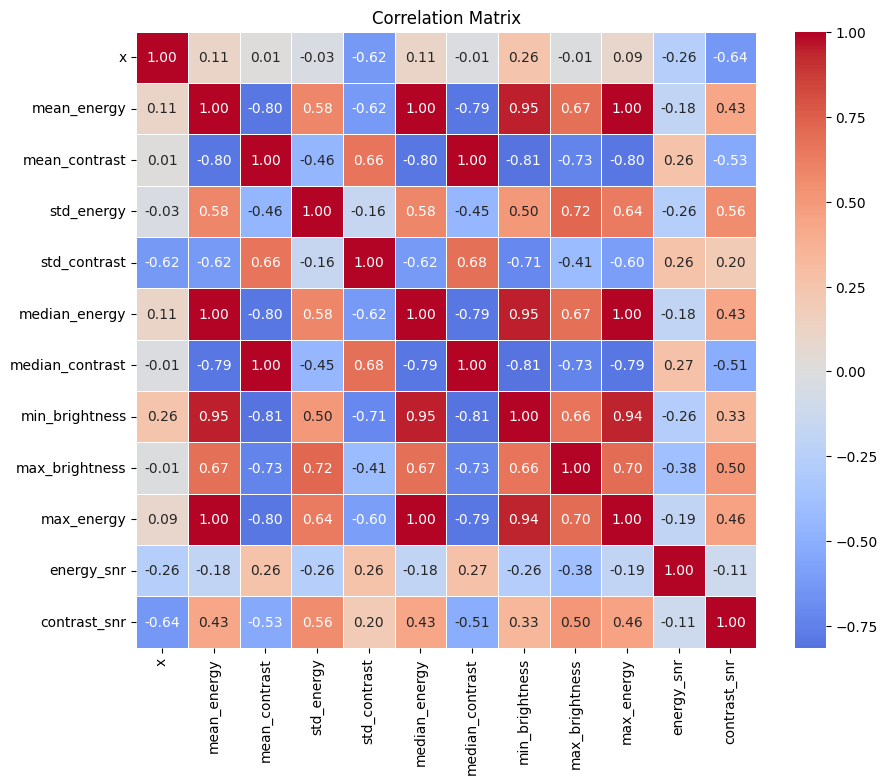

In [7]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

According to the correlation matrix, mean, median, and max energy are all highly correlated to each other which means that they likely represent similar data, which makes sense considering the column names. There is a similar relationship between mean and median contrast who also have a very high correlation coeffecient. Other strong relationships can be observed between mean energy, median energy, and min brightness (0.95 correlation coeffecient), meaning it is worth exploring more later. Similarly, max brightness and std_energy also have a relatively strong positive correlation (0.72). Mean/median/max energy have a strong negative correlation with mean/median constrast (about -0.8). This may suggest that higher energy means a higher snr for contrast, and vice versa a higher contrast responds to a lower snr. Overall there seems to be a relatively clear cut structure with strong correlations of clusters of data, such as energy-related features and contrast-related. The relationship of energy and contrast features also provides potentially useful information and emphasizes the data's structure further.

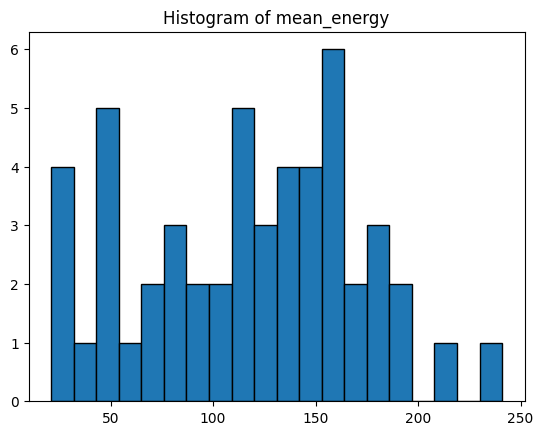

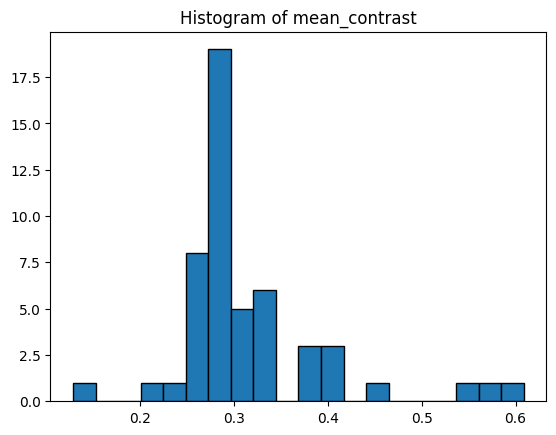

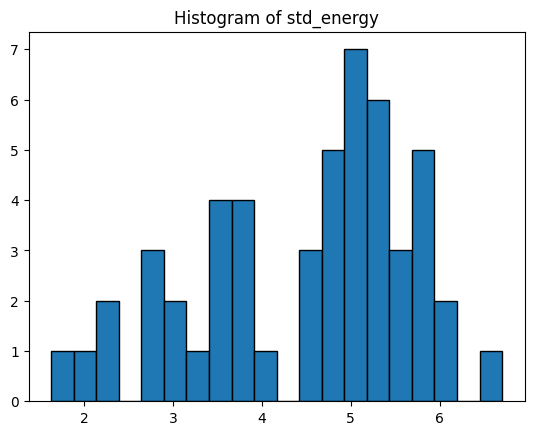

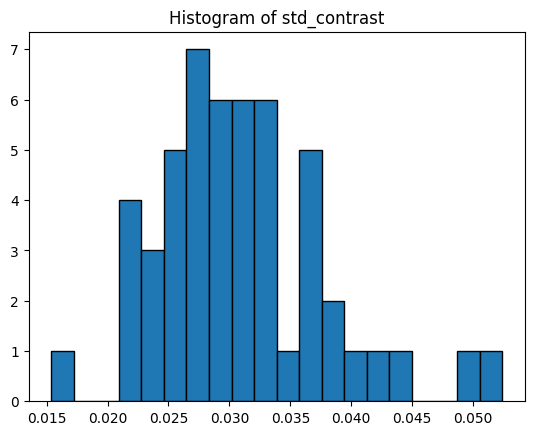

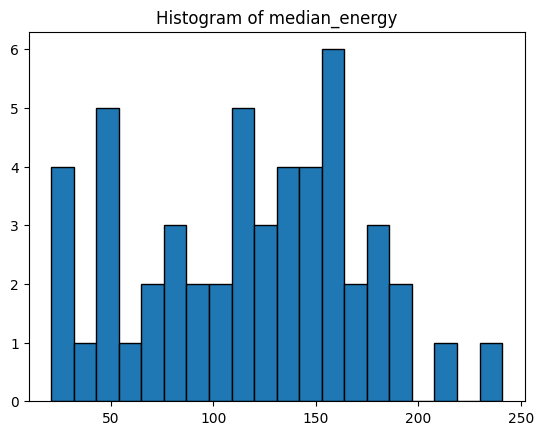

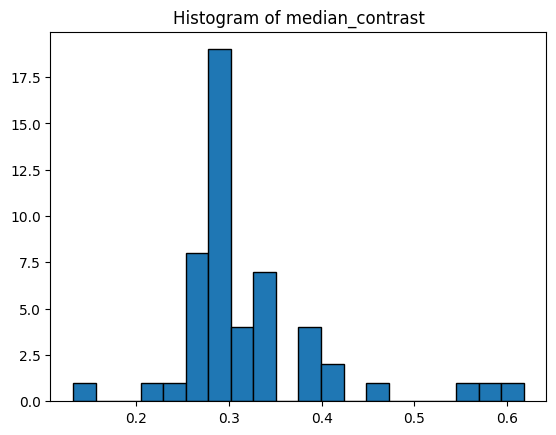

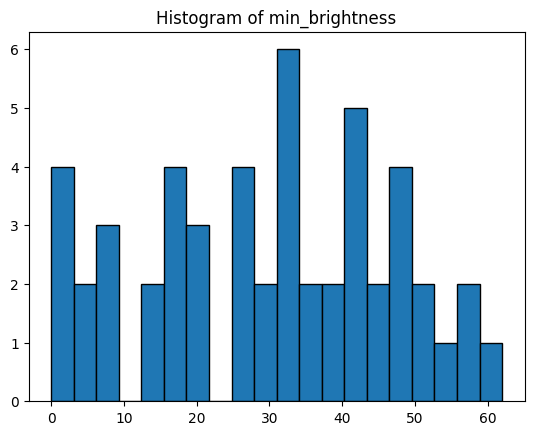

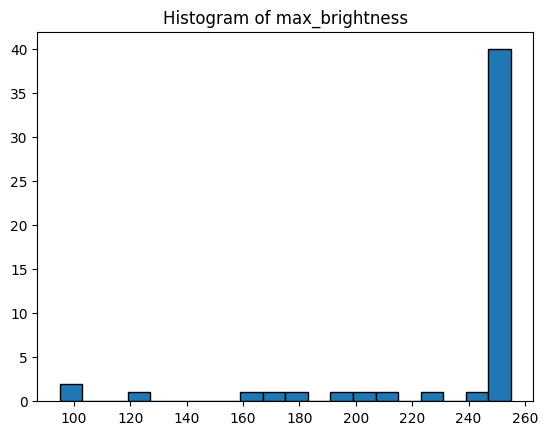

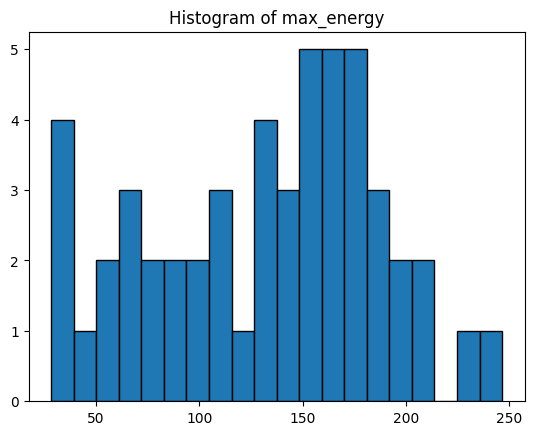

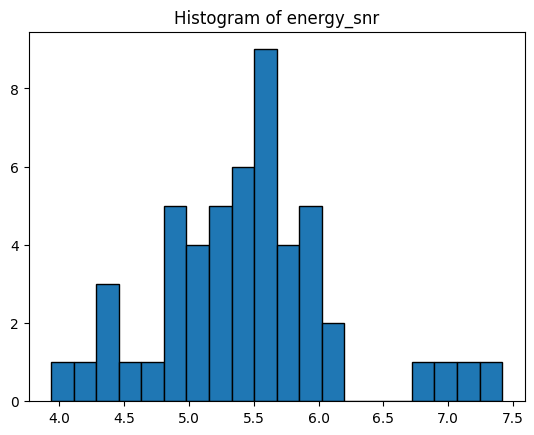

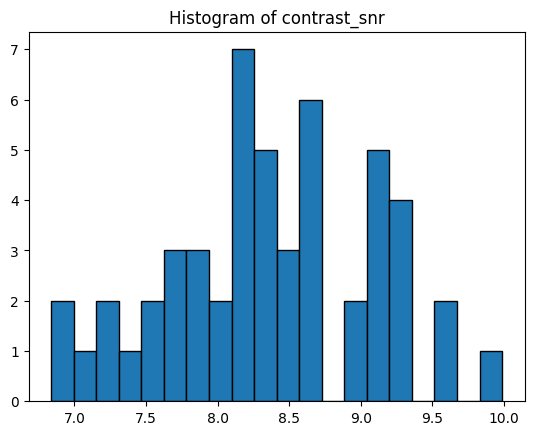

In [8]:
for column in df.columns[1:]:
    data = df[column].dropna()
    
    plt.hist(data, bins=20, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.show()

Part of meeting basic statistical assumptions is ensuring that the data is normally distributed. By plotting the histograms, if the data takes on a bell-curve shape we can ensure that is it normally distributed. For most of the graphs except for max_brightness explicitly, it seems to follow that general trend leading to show that most of the data is normally distributed.

## **Exploratory Data Analysis**

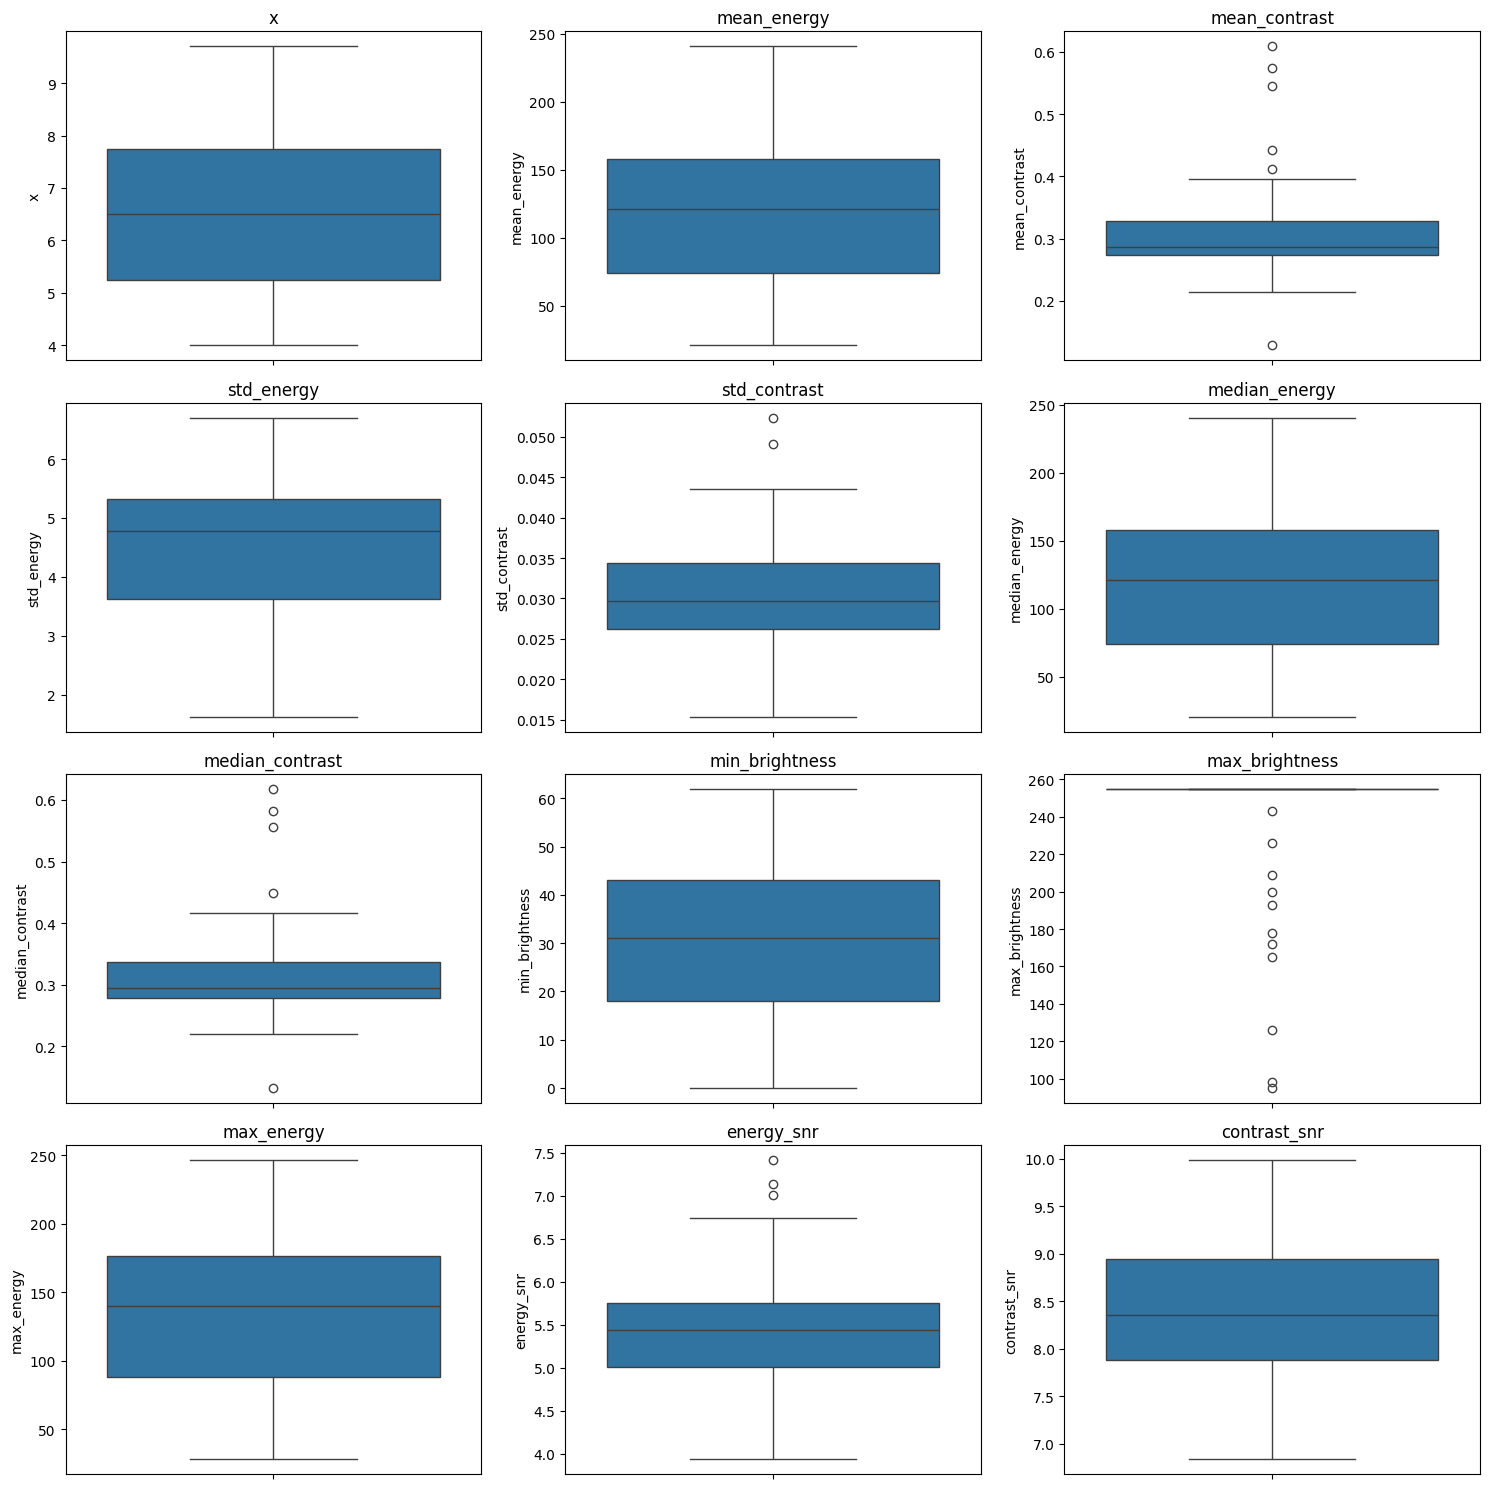

In [9]:
# Box plots to check if there are any obvious outliers that can be found
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
axs = axs.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [10]:
# Calculate the z score for verification of outliers
z = stats.zscore(df.select_dtypes(include=[np.number]))
outliers = np.where((z > 3) | (z < -3))
outlier_rows, outlier_cols = outliers
for row, col in zip(outlier_rows, outlier_cols):
    print(f"Outlier at row {row}, column '{df.columns[col]}'")

Outlier at row 9, column 'mean_contrast'
Outlier at row 9, column 'std_contrast'
Outlier at row 9, column 'median_contrast'
Outlier at row 29, column 'mean_contrast'
Outlier at row 29, column 'median_contrast'
Outlier at row 29, column 'max_brightness'
Outlier at row 47, column 'max_brightness'


Because both the box plots and the z-score indicate that there are outliers in the max_brightness column, it is worth exploring further. Additionally, we can see that the z_score indicated multiple times that there were outliers in row 9 and row 29. This likely means that they should be removed.

In [11]:
max_brightness_counts = df['max_brightness'].value_counts()
print(max_brightness_counts)

max_brightness
255    40
243     1
165     1
178     1
172     1
209     1
226     1
126     1
98      1
193     1
95      1
200     1
Name: count, dtype: int64


In [12]:
max_brightness_outlier_rows = [row for row, col in zip(outlier_rows, outlier_cols) if df.columns[col] == 'max_brightness']
outlier_rows_df = df.loc[max_brightness_outlier_rows]
print(outlier_rows_df)

      x  mean_energy  mean_contrast  std_energy  std_contrast  median_energy  \
29  6.9    20.980589       0.573592    2.070365      0.040778      20.810250   
47  8.8    21.739909       0.443025    1.630478      0.029713      21.670036   

    median_contrast  min_brightness  max_brightness  max_energy  energy_snr  \
29         0.581696               0              98   28.268975    7.013281   
47         0.448062               2              95   28.306823    4.863299   

    contrast_snr  
29      7.192650  
47      6.837891  


Considering that row 29 has multiple outliers and also has the second lowest max_brightness, the row should definetly be removed as an outlier. I would also remove row 9 for similar reasons. Finally, I would remove row 47 as they have the lowest max_brightness score by far with most of the values being in the mid 200s.

In [13]:
rows = [9, 29, 47]
df = df.drop(rows)

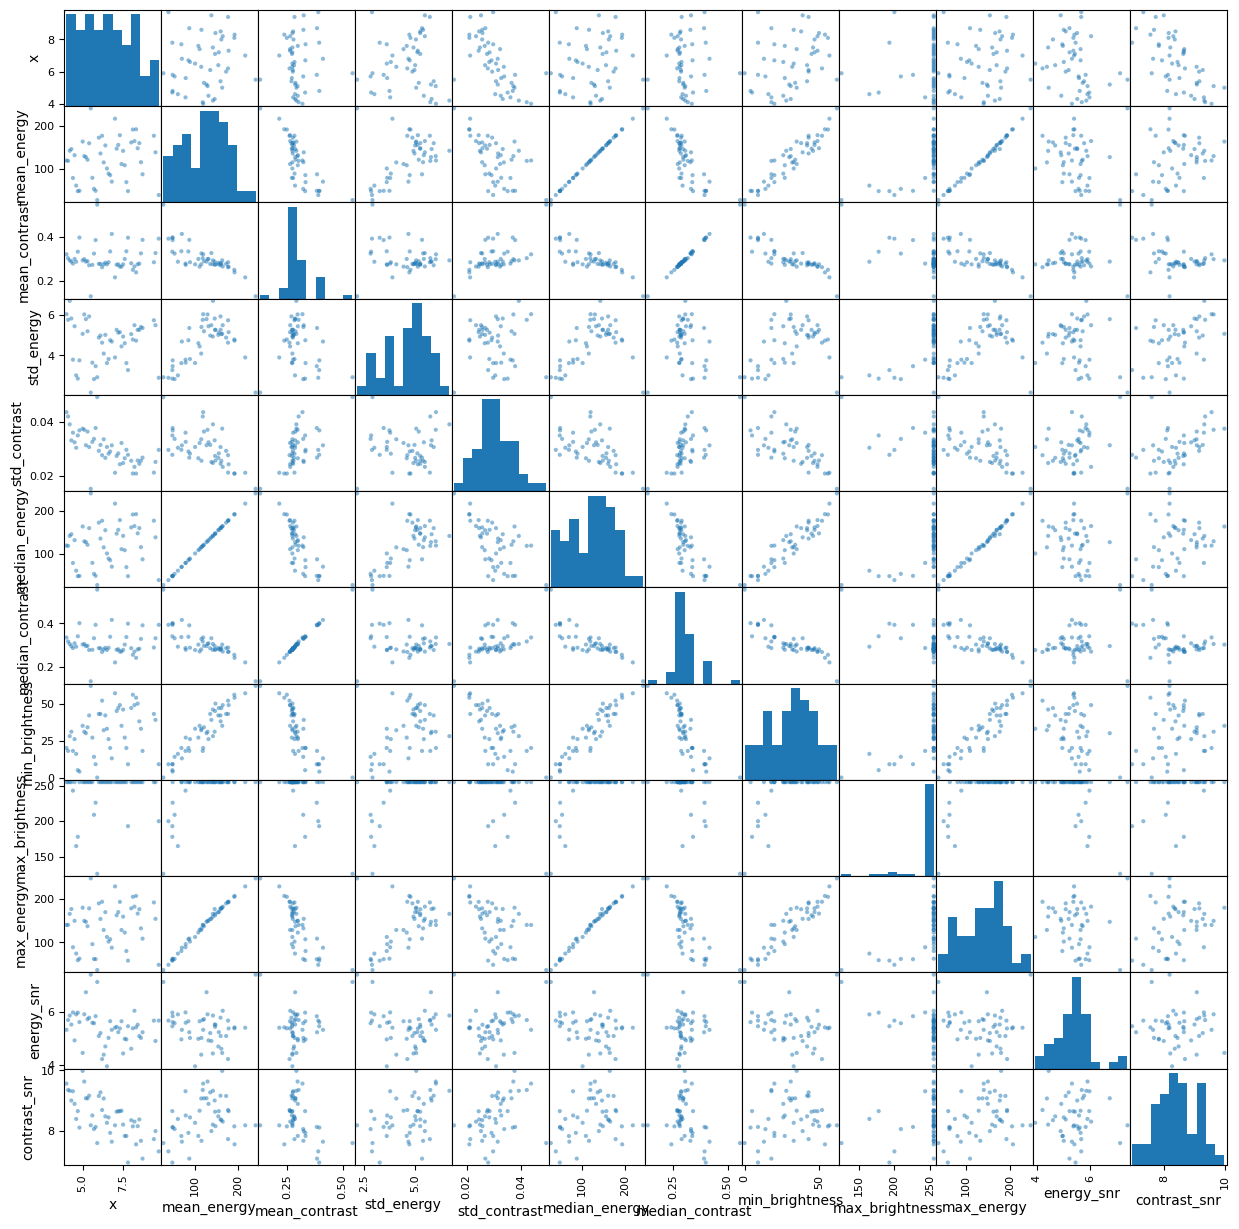

In [14]:
# Explore the relationship between the features
pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.show()

As mentioned in the start when we looked at the correlation matrix, the positive correlation between energy and brightness and the negative correlation between energy and contrast are worth exploring, as further evidenced by the trends in the graphs above. 

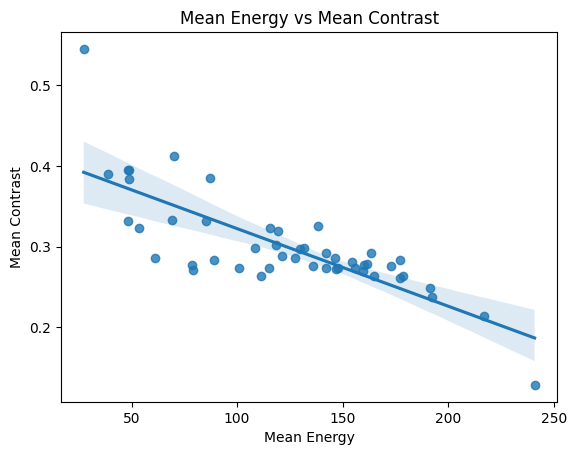

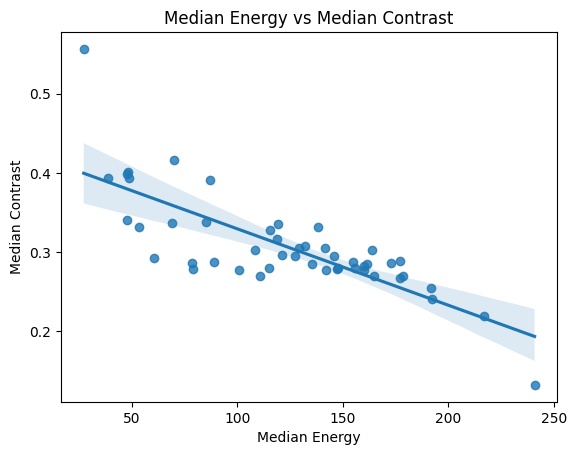

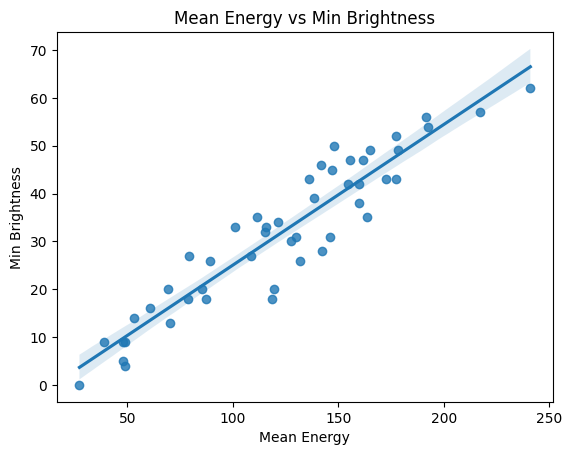

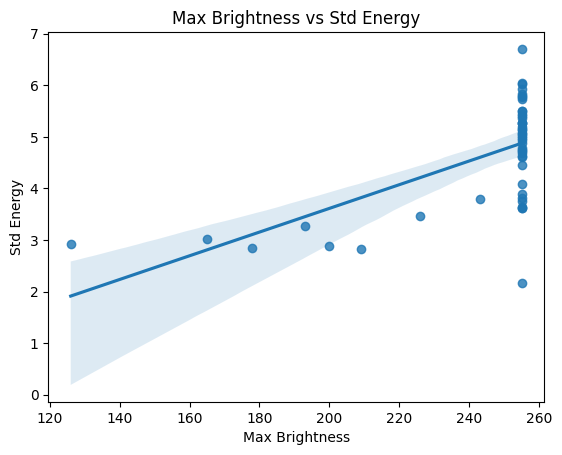

In [15]:
# Mean_energy and mean_contrast
sns.regplot(x='mean_energy', y='mean_contrast', data=df)
plt.title('Mean Energy vs Mean Contrast')
plt.xlabel('Mean Energy')
plt.ylabel('Mean Contrast')
plt.show()

# Median_energy and median_contrast
sns.regplot(x='median_energy', y='median_contrast', data=df)
plt.title('Median Energy vs Median Contrast')
plt.xlabel('Median Energy')
plt.ylabel('Median Contrast')
plt.show()

# Mean_energy and min_brightness
sns.regplot(x='mean_energy', y='min_brightness', data=df)
plt.title('Mean Energy vs Min Brightness')
plt.xlabel('Mean Energy')
plt.ylabel('Min Brightness')
plt.show()

# Max_brightness and std_energy
sns.regplot(x='max_brightness', y='std_energy', data=df)
plt.title('Max Brightness vs Std Energy')
plt.xlabel('Max Brightness')
plt.ylabel('Std Energy')
plt.show()

On basis of these scatter plots, there is definetly a strong relationship between mean energy vs mean contrast, median energy vs median contrast, and mean energy vs min brightness.

In [16]:
# Preform linear regression to better understand relationships / model predictions 
# Mean_energy vs mean_contrast
X = df[['mean_energy']]
y = df['mean_contrast']
model = LinearRegression().fit(X, y)
print("Mean energy vs Mean Contrast")
print('Coefficient:', model.coef_)
print('R^2:', model.score(X, y))

# Median_energy vs median_contrast
X = df[['median_energy']]
y = df['median_contrast']
model = LinearRegression().fit(X, y)
print("\nMedian energy vs Median Contrast")
print('Coefficient:', model.coef_)
print('R^2:', model.score(X, y))

# Mean_energy vs min_brightness
X = df[['mean_energy']]
y = df['min_brightness']
model = LinearRegression().fit(X, y)
print("\nMean energy vs Min brightness")
print('Coefficient:', model.coef_)
print('R^2:', model.score(X, y))

Mean energy vs Mean Contrast
Coefficient: [-0.00096115]
R^2: 0.6136491767517434

Median energy vs Median Contrast
Coefficient: [-0.00096674]
R^2: 0.6082390848924142

Mean energy vs Min brightness
Coefficient: [0.29405179]
R^2: 0.8784809029096481


With mean energy and mean contrast, for every unit increase in mean energy, there is a -0.00096115 unit decrease in mean contrast, indicating an inverse relationship. The r^2 score tells us that around 61.4% of the variance in mean contrasted is due to mean energy. We see a similar relationship with median energy and contrast, with a decrease in 0.00096674 units instead. With mean energy and min brightness, the coefficient tells us that for every unit increase in mean energy the min brightness increases by 0.29405179 units in a direct relationship. There is also an immensely high r^2 score of 87.8% showing a very strong relationship. Overall, on the basis of the statistics, correlation matrix, visualizations, and linear regression, these three relationships seem to be the most significant.  

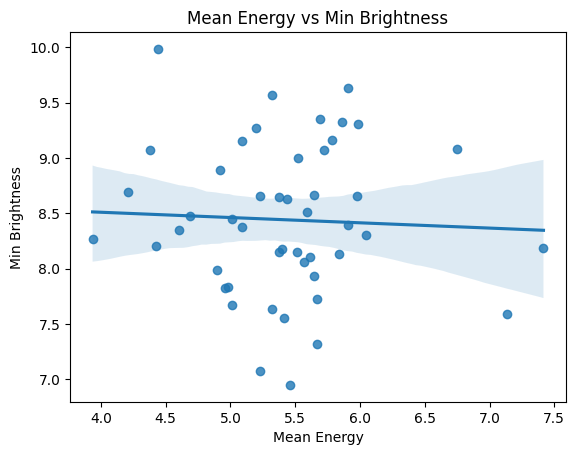

In [17]:
# Visualization of energy_snr and contrast_snr
sns.regplot(x='energy_snr', y='contrast_snr', data=df)
plt.title('Mean Energy vs Min Brightness')
plt.xlabel('Mean Energy')
plt.ylabel('Min Brightness')
plt.show()